In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
iris = load_iris()

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
X, y = iris.data, iris.target

print(X.shape, y.shape)

(150, 4) (150,)


In [ ]:
print(np.unique(y))
print(iris.target_names)

[0 1 2]
['setosa' 'versicolor' 'virginica']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=42)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


In [ ]:
std_scaler = StandardScaler()

std_scaler = std_scaler.fit(X_train)

X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

# Logistic Regression

In linear regression, the model looks something as follows,

> $\hat{f}(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_mx_m$

Here,

> $\theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_mx_m \in [-\infty, \infty]$

> $\hat{f}(x) \in [-\infty, \infty]$

But, for a classification problem, the output should be a probability value $(i.e., \hat{f}(x) \in (0,1))$


Hence, we'll take `log-odds(also known as logits)` for our function

> $logit(p) = \log(\frac{p}{1+p})$

Hence, our logistic model would look something like this,

> $\hat{f}(x) = \log(\frac{p}{1+p})$

> $z = \log(\frac{p}{1+p})$

On solving the above equation for `p`, we get,

> $p = \frac{1}{1+e^{-z}}$

This is called the `logistic sigmoid function`

where, 
> $z = \Theta X = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_mx_m$

![alt text](https://drive.google.com/uc?id=1HZRILXdTstoyjvVYCmEl2HmN4YIQAPGO)

Now, since we have our model ready, 
by using a loss function like `Cross Entropy` and a learning algorithm like gradient descent, we can train our model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(C=100, random_state=0) # 0.01
# Here, C is the regularization parameter C = 1/alpha

lr = lr.fit(X_train_std, y_train)

In [ ]:
y_test_pred = lr.predict_proba(X_test_std[:3,:])

y_test_pred

array([[9.99893816e-01, 1.06183812e-04, 3.05331718e-21],
       [2.51800985e-06, 2.92317489e-01, 7.07679993e-01],
       [3.35272352e-02, 9.66472098e-01, 6.66868518e-07]])

In [ ]:
y_test_pred.sum(axis=1)

array([1., 1., 1.])

In [ ]:
print(y_test_pred.argmax(axis=1)) 
print(iris.target_names)

[0 2 1]
['setosa' 'versicolor' 'virginica']


In [ ]:
lr.predict(X_test_std[:3, :])

array([0, 2, 1])

In [ ]:
print(lr.score(X_train_std, y_train))
print(lr.score(X_test_std, y_test))

0.9833333333333333
1.0


# Maximum margin classification with Support Vector Machines(SVMs)

In logistic regression, our objective was to minimize the misclassification error. 
In SVMs, the objective is to maximize the margin

The margin can be defined as the distance between the hyperplane(decision boundary), and the training samples that are closest to the hyperplanes

![alt text](https://miro.medium.com/max/921/1*06GSco3ItM3gwW2scY6Tmg.png)

In [ ]:
from sklearn.svm import SVC

In [ ]:
linear_svm = SVC(C=1.0, kernel='linear', random_state=0)
linear_svm = linear_svm.fit(X_train_std, y_train)

In [ ]:
print(linear_svm.score(X_train_std, y_train))
print(linear_svm.score(X_test_std, y_test))

0.975
1.0


![alt text](https://drive.google.com/uc?id=1DU_c0T-XuaGJZUgFodalQLrXuyl2LnfX)

## Non-linear SVM Kernels

> How does the kernel trick work?

We apply a non-linear kernel function on the data that transforms the dataset to a new dimensional space where the data is linearly separable.

![alt text](https://drive.google.com/uc?id=1SNfOCGOdUDrUWd9ienjOAajz3aA0eiaY)

The most widely used kernel is the RBF(Radial Basis function kernel) also known as the Gaussian kernel.

$\mathcal{K}(x^{(i)}, x^{(j)}) = e^{(-\gamma ||x^{(i)} - x^{(j)}||^2)}$

where, 
$\gamma = \frac{1}{2\sigma^2}$

In [ ]:
kernel_svm = SVC(C=1.0, kernel='rbf', random_state=0)
kernel_svm = kernel_svm.fit(X_train_std, y_train)

In [ ]:
print(kernel_svm.score(X_train_std, y_train))
print(kernel_svm.score(X_test_std, y_test))

0.975
0.9666666666666667


# KNN (K-Nearest Neighbors)

It is known as the lazy learning algorithm since it doesn't actually learn the classification task. But instead it memorizes the dataset.

```
ALGORITHM:
1. Choose the number of 'k' and a distance metric.
2. Find the k-nearest neighbors of the sample that we want to classify
3. Assign the class label by majority vote.
```

![alt text](https://drive.google.com/uc?id=1AIZhlmsMR5dAfyaWEW9eaEmGTkOVjkPd)
![alt text](https://camo.githubusercontent.com/304152de4fe39d703af34efc8c47ad6c00685577/687474703a2f2f7777772e7361656473617961642e636f6d2f696d616765732f4b4e4e5f73696d696c61726974792e706e67)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn = knn.fit(X_train_std, y_train)

In [ ]:
print(knn.score(X_train_std, y_train))
print(knn.score(X_test_std, y_test))

0.975
0.9333333333333333


# Naive-Bayes

The Naive-Bayes algorithm works with an assumption that there is no dependence what so ever between the input features(i.e., all the features are independent variables)

![alt text](https://www.analyticsvidhya.com/wp-content/uploads/2015/09/Bayes_rule-300x172-300x172.png)


    P(c|x) is the posterior probability of class (c, target) given predictor (x, attributes).
    P(c) is the prior probability of class.
    P(x|c) is the likelihood which is the probability of predictor given class.
    P(x) is the prior probability of predictor.



~Source: [Analytics Vidya](https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/)


**Multi-variate Bernoulli Naive Bayes** The binomial model is useful if your feature vectors are binary (i.e., 0s and 1s). One application would be text classification with a bag of words model where the 0s 1s are "word occurs in the document" and "word does not occur in the document"

**Multinomial Naive Bayes** The multinomial naive Bayes model is typically used for discrete counts. E.g., if we have a text classification problem, we can take the idea of bernoulli trials one step further and instead of "word occurs in the document" we have "count how often word occurs in the document", you can think of it as "number of times outcome number x_i is observed over the n trials"

**Gaussian Naive Bayes** Here, we assume that the features follow a normal distribution. Instead of discrete counts, we have continuous features (e.g., the popular Iris dataset where the features are sepal width, petal width, sepal length, petal length).

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()
nb = nb.fit(X_train_std, y_train)

In [ ]:
print(nb.score(X_train_std, y_train))
print(nb.score(X_test_std, y_test))

0.9583333333333334
0.9666666666666667


# Decision Trees

Among all the ML algorithms, Decision trees are the most interpretable of them all.


As the name suggests, we can think of the model as breaking down the data by making decision based on asking a series of questions.


Decision trees don't need the data to be standardized

![alt text](https://drive.google.com/uc?id=1M5G_r7JadD3aT63_rCoD0Y5GB3JX-qFX)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier(criterion='gini',
                              max_depth=4, 
                              random_state=0)
tree = tree.fit(X_train, y_train)

In [ ]:
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

0.9916666666666667
0.9333333333333333


In [ ]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image

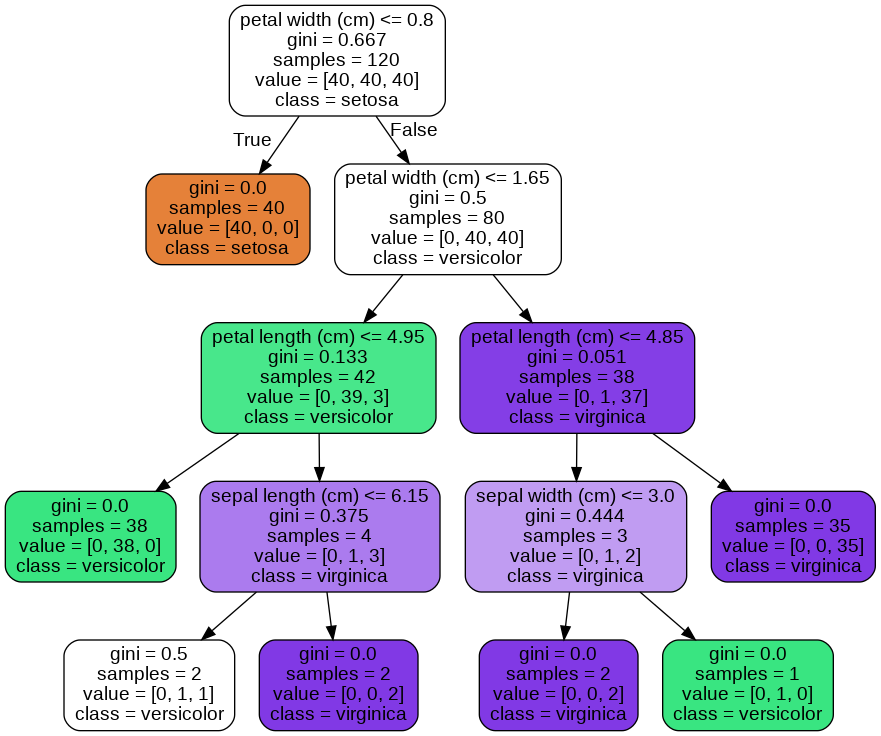

In [ ]:
dot_data = export_graphviz(tree, 
                           filled=True, 
                           rounded=True,
                           class_names=iris.target_names,
                           feature_names=iris.feature_names,
                           out_file=None)
graph = graph_from_dot_data(dot_data)

Image(graph.create_png())

# Random Forest classifier

A Random Forest can be considered as an ensemble of multiple decision trees.

The idea behind random forest is to average multiple deep decision trees that individually suffer from high variance, to build a robust model with good generalization performance and is less susceptible to overfitting.

```
ALGORITHM:
1. Draw a random Bootstrap sample of size n(randomly choose n samples from the training set with replacement).
2. Grow a decision tree from the bootstrap sample. At each node:
  a) Randomly select d features without replacement.
  b) Split the node using the feature that provides the best split according to the objective function, for instance, maximizing the information gain.
3. Repeat the steps 1,2 k-times. Hence generating k decision trees.
4. Aggregate the prediction by each tree to assign the class label by majority vote.
```

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25,
                                random_state=0)

forest = forest.fit(X_train, y_train)

In [ ]:
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

1.0
0.9333333333333333
